In [1]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train = pd.read_csv(r'../../data/train_data.csv')
Y_train = X_train["Category"]

X_test = pd.read_csv(r'../../data/test_data.csv')
Y_test = X_test["Category"]
X_train= X_train.iloc[:, [i for i in range(13,28)]+ [7,8,9]]
X_test= X_test.iloc[:, [i for i in range(13,28)]+ [7,8,9]]

In [2]:
# X_train, X_valid, y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2,stratify=Y_train, random_state=42)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [4]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, Y_train)
# make predictions
y_pred = bst.predict(X_test)
y_pred_prob = bst.predict_proba(X_test)[:, 1]

c:\Users\Tom\.virtualenvs\pro5d-classification-prolactinoma-FBKpBkq7\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Tom\.virtualenvs\pro5d-classification-prolactinoma-FBKpBkq7\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Tom\.virtualenvs\pro5d-classification-prolactinoma-FBKpBkq7\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Tom\.virtualenvs\pro5d-classification-prolactinoma-FBKpBkq7\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtyp

In [5]:
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9347826086956522
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        79
           1       0.68      1.00      0.81        13

    accuracy                           0.93        92
   macro avg       0.84      0.96      0.89        92
weighted avg       0.96      0.93      0.94        92

Confusion Matrix:
 [[73  6]
 [ 0 13]]


In [6]:
le.inverse_transform(y_pred)

array(['non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'prolaktinom', 'prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'non-prolaktinom', 'non-prolaktinom',
       'non-prolaktinom', 'no

In [7]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)

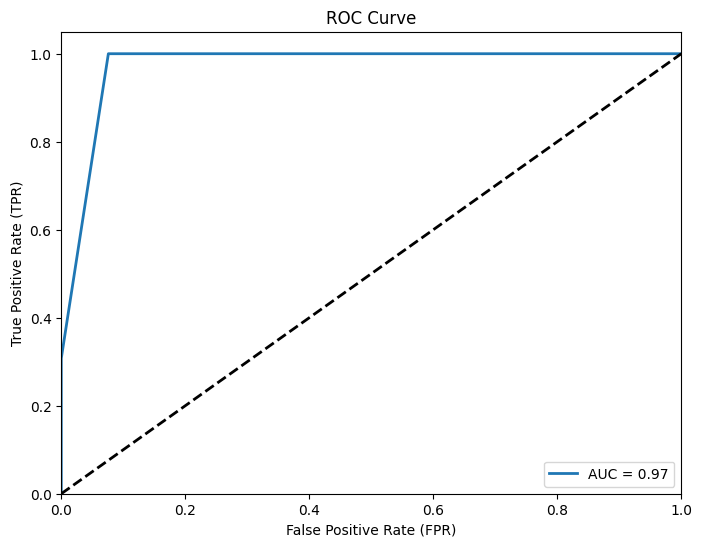

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
